# THE STAR WARS FILMS FRANCHISE 

While waiting for the Star Wars VII: The Force Awakens to come out, the team at FiveThirtyEight collected data through online survey to assess the popularity of each individual film in Star Wars.

The aim of this project is to determine the most favorite film and character in Star Wars franchise.

Dataset:

 - RespondentID: An anonymized ID for the respondent (person taking the survey)
- Gender: The respondent's gender
- Age: The respondent's age
- Household Income: The respondent's income
- Education: The respondent's education level
- Location (Census Region): The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise?: Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise?: Has a Yes or No response

## Load data

In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

In [2]:
pd.set_option('display.max_columns', None)
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Retur

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Initial summary of a data set:

After reading the first few columns of the data frame it can be noticed that there are more than 20 Unnamed columns that might be difficult to analyse the data. Hence, I will try to change these column names by looking for relevant data. 

First I will extract the name of the characters from the first row and then drop the first row. 

## Data cleaning

In [4]:
column_names = list(star_wars.iloc[:,15:29].columns)#Extracting the column names
char_names = list(star_wars.iloc[0,15:29])#Extracting the character names
char_names_dict = {}        #Creating an empty dictionary 
i = 0
for c in column_names:                  #Loop over column names
    char_names_dict[c] = char_names[i]  #Appending keys and values to
    i += 1
star_wars.rename(char_names_dict,axis=1,inplace=True) #Renaming from Unnamed 16 to Unnamed 28 with character names

In [5]:
# Removing rows where RespondentID is NAN
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [6]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Changing two first column to boolean values.

In [9]:
yes_no = {"Yes": True, "No": False}

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']= star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [10]:
yes_no = {"Yes": True, "No": False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [11]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


As previously done with the first two columns I will rename the next columns for better readability and change the values to bolean. 

In [12]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [13]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [14]:
star_wars = star_wars.rename(columns = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                                      'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4',
                                       'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'})

In [15]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [16]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [17]:
star_wars = star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1', 
                                        'Unnamed: 10': 'ranking_2', 'Unnamed: 11': 'ranking_3',
                                       'Unnamed: 12': 'ranking_4', 'Unnamed: 13': 'ranking_5',
                                       'Unnamed: 14': 'ranking_6'} )

In [18]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Next columns worth to look at are the names columns. Looking into character names columns, it ca be noticed that results are in string objects. Hence I will transform string objects into numerical values for future analysis.

In [19]:
star_wars.iloc[:,15].value_counts(dropna=False) 

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

These values can be divided to four groups : favorably, unfavorably, neutral, unfamiliar. I will change values in these columns to numerical values where favorably - 1, unfavorably - 2, neutral - 3, unfamiliar - 4

In [20]:
character_mapping = {
    "Very favorably": 1,
    np.nan: 4,
    "Somewhat favorably": 1,
    "Neither favorably nor unfavorably (neutral)": 3,
    "Unfamiliar (N/A)": 4,
    "Somewhat unfavorably": 2,
    "Very unfavorably": 2 
}

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(character_mapping)

In [21]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,1,1,1,1,1,1,1,4,4,1,1,1,1,1,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,1,1,1,1,1,4,4,4,4,4,4,4,4,4,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,1,1,1,1,1,1,1,1,2,1,1,1,1,1,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,1,1,1,2,1,2,1,3,1,1,1,2,1,1,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Data Analysis

Calculating the mean of ranking columns allows to see which movie was highly rated.

In [22]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [23]:
movie_names = [] # creating a list of movie titles
for i in ['I', 'II', 'III', 'IV', 'V', 'VI']:
    name = 'Star Wars {}'.format(i)
    movie_names.append(name)
    
print(movie_names)

['Star Wars I', 'Star Wars II', 'Star Wars III', 'Star Wars IV', 'Star Wars V', 'Star Wars VI']


### The worst Star Wars movie

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

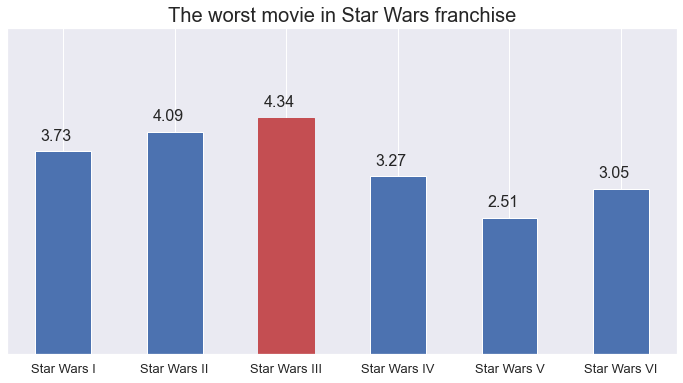

In [25]:
plt.figure(figsize =(12,6))
ax = star_wars.iloc[:,9:15].mean().plot.bar(ylim = (0,6), position = 0)

perc = list(star_wars.iloc[:,9:15].mean().astype(float))
for i in range(0,6):
    x = i + 0.05
    y = perc[i] + 0.2
    string = str(round(perc[i],2))
    ax.text(x,y,string,fontsize=16)
ax.get_children()[2].set_color('r')                                                                             ###Remove grid
ax.set_yticks([])                                                               
ax.set_xticks(np.arange(0,6)+0.25)                                               
ax.set_xticklabels(movie_names,fontsize=13,rotation=0)                        
plt.title('The worst movie in Star Wars franchise',fontsize=20,fontweight=525)  
plt.show()

The survey asked a total of 1186 individuals how much do they hate each film in the Star Wars franchise. Therefore, the higher the rating, the worse the movie is. From the graph above it can be noticed that Star Wars III is the most disliked movie. 

It will be worth it to check if in both gender opinions about the movies are the same. 

In [26]:
# Splitting the data to check how the rankning looks like by gender

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == 'Female']

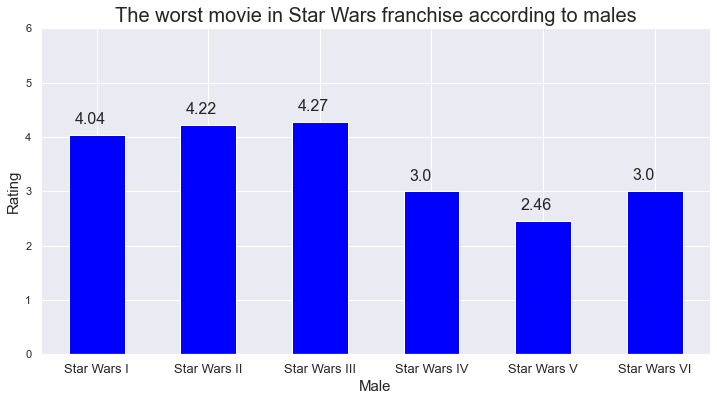

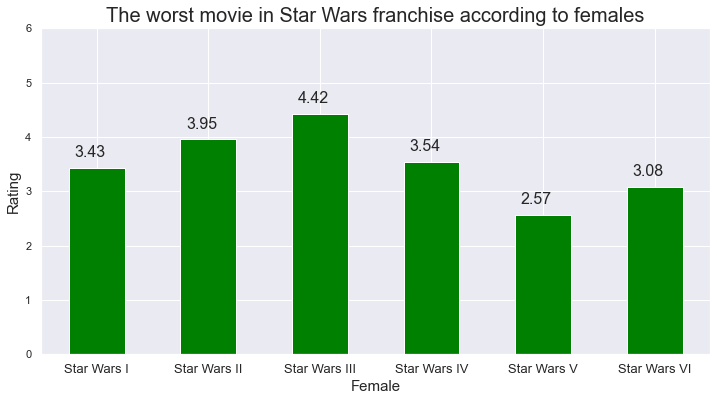

In [27]:
# First plot - males
plt.figure(figsize =(12,6))
ax = males.iloc[:,9:15].mean().plot.bar(color = 'blue', ylim = (0,6), position = 0)

# Generating numbers to the graph
perc = list(males.iloc[:,9:15].mean().astype(float))
for i in range(0,6):
    x = i + 0.05
    y = perc[i] + 0.2
    string = str(round(perc[i],2))
    ax.text(x,y,string,fontsize=16)
# Grid and axes                                                              
ax.set_xticks(np.arange(0,6)+0.25)                                               
ax.set_xticklabels(movie_names,fontsize=13,rotation=0)
plt.xlabel('Male',fontsize=15)
plt.ylabel('Rating',fontsize=15)
plt.title('The worst movie in Star Wars franchise according to males',fontsize=20,fontweight=525)  
plt.show()


# Second plot - females
plt.figure(figsize =(12,6))
ax = females.iloc[:,9:15].mean().plot.bar(color = 'green', ylim = (0,6), position = 0)

# Generating numbers to the graph
perc = list(females.iloc[:,9:15].mean().astype(float))
for i in range(0,6):
    x = i + 0.05
    y = perc[i] + 0.2
    string = str(round(perc[i],2))
    ax.text(x,y,string,fontsize=16)
# Grid and axes                                                              
ax.set_xticks(np.arange(0,6)+0.25)                                               
ax.set_xticklabels(movie_names,fontsize=13,rotation=0)
plt.xlabel('Female',fontsize=15)
plt.ylabel('Rating',fontsize=15)
plt.title('The worst movie in Star Wars franchise according to females',fontsize=20,fontweight=525)  
plt.show()

It looks like both gender dislike the third movie the most - 'Star Wars III: Revenge of the Sith'. Also can be noticed that people tend to like the latest movies more than the old ones. 

## The most viewed Star Wars movie

To see which movies were the most popular and have the most viewers I will select the column : 'Have you seen any of the 6 films in the Star Wars franchise?' only with TRUE values. 

In [28]:
movie_seen = star_wars[star_wars['Have you seen any of the 6 films in the Star Wars franchise?']]
movie_seen.shape

(936, 38)

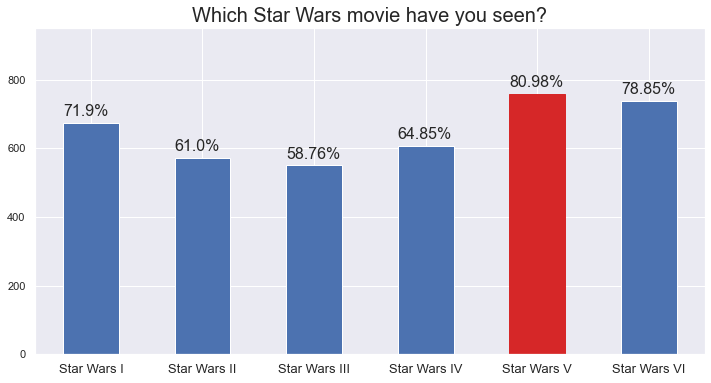

In [29]:
# Second plot - females
plt.figure(figsize =(12,6))
ax = movie_seen.iloc[:,3:9].sum().plot.bar( ylim = (0,950), position = 0)

# Generating numbers to the graph
perc = list(movie_seen.iloc[:,3:9].sum().astype(int))
for i in range(0,6):
    x = i
    y = perc[i] + 20
    string = str(round(perc[0+i]/936*100,2)) + '%'
    ax.text(x,y,string,fontsize=16)
# Grid and axes
ax.get_children()[4].set_color('#D62728')                                      ###Set fifth bar plot to #D62728
ax.set_xticks(np.arange(0,6)+0.25)                                               
ax.set_xticklabels(movie_names,fontsize=13,rotation=0)
plt.title("Which Star Wars movie have you seen?",fontsize=20,fontweight=525)  
plt.show()

Over 80% of people watched 'Star Wars V The Empire Strikes Back' followed by the next part Star Wars VI - around 79%. The least popular movie was Star Wars III : 'Revenge of the Sith'.

## Fans Rating

From the survey we know that it provided information whether the viewer had watched all of the Star Wars movies. That can help us determine which one of the all movies watched by fan was highly rated. To check this all TRUE values from all 'seen' columns have to be extracted.  

In [30]:
star_wars['all_seen'] = star_wars.iloc[:,3:9].all(axis=1)
star_wars['all_seen'].sum()

471

There are 471 people who watched all 6 movies. Let's see how fans rank movies remembering that 1 is the most favorite while 6 is the most disliked.

In [31]:
ranking_all = star_wars[star_wars['all_seen']].iloc[:,9:15]
ranking_all.head(10)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
13,3.0,4.0,5.0,6.0,1.0,2.0
14,4.0,5.0,6.0,2.0,3.0,1.0
15,4.0,2.0,5.0,3.0,1.0,6.0


To visualize the results on the graph rows where it shows the sum of rows that contains 1 for each movie(column) is needed as well as percentage rows to compared 6 movies as a whole.

In [32]:
ranking_all.loc['number of 1s'] = (ranking_all == 1).sum(axis=0)                       
ranking_all.loc['% of 1s'] = round(ranking_all.loc['number of 1s']/ 471 *100,2) 
pd.DataFrame(ranking_all.loc[['number of 1s','% of 1s']])

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
number of 1s,47.00,18.00,27.00,128.00,169.00,82.00
% of 1s,9.98,3.82,5.73,27.18,35.88,17.41


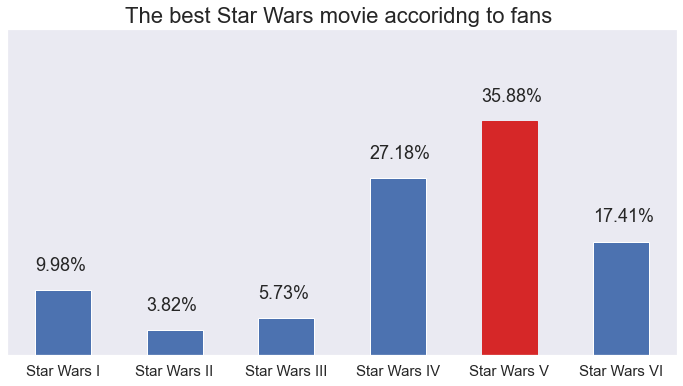

In [33]:
plt.figure(figsize=(12,6))
ax = ranking_all.loc['% of 1s'].plot.bar(ylim=(0,50),position=0)
ax.set_xticks(np.arange(0,6))

num = list(ranking_all.loc['% of 1s'])
for i in range(0,6):                                                
    x = i
    y = num[i]+3
    string = str(num[i])
    string = string + '%'
    ax.text(x,y,string,fontsize=18)
    
ax.get_children()[4].set_color('#D62728')                                
ax.grid(False)                                                           
ax.set_yticks([])                                                        
ax.set_xticks(np.arange(0,6)+0.25)                                       
ax.set_xticklabels(movie_names,rotation=0,fontsize=15)                
plt.title('The best Star Wars movie accoridng to fans ',fontsize=22,fontweight=525)
plt.show()

The most popular movie among fans is Star Wars V: The Empire Strikes Back . However fans rated Star Wars II as the worst movie followed by number III. 

## Characters

As the movies have been analyzed it is good to check which character viewers liked the most. Based on the previous analysis 936 viewers watched a Star Wars movies hence to further analysis I will take only these responders.

In [34]:
all_characters = movie_seen.iloc[:,15:29].T        
all_characters

,1,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,45,46,48,49,51,52,53,54,55,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,86,89,91,92,94,95,96,97,98,99,100,101,102,103,106,107,108,109,110,111,112,113,114,115,117,118,121,123,124,126,128,130,132,133,134,136,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,159,160,161,162,163,164,165,166,167,168,169,170,171,173,174,175,176,177,178,179,180,181,182,184,186,187,188,189,191,192,195,197,198,199,201,203,204,205,207,208,209,210,211,212,213,216,217,218,221,223,224,225,226,228,229,230,231,232,233,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,264,265,267,268,269,270,271,272,273,274,275,276,277,278,280,281,282,283,284,285,286,288,290,291,292,295,296,298,299,300,302,303,304,305,306,308,309,310,311,312,314,315,316,317,318,319,320,321,323,324,326,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,346,347,348,349,350,351,352,353,354,355,357,358,360,361,363,365,366,367,369,370,371,372,373,374,375,376,377,378,380,382,383,384,385,388,389,390,391,392,393,394,396,397,398,399,400,401,402,403,404,405,406,407,409,410,411,412,413,414,415,416,417,418,419,420,422,423,424,425,426,427,428,429,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,448,449,450,453,454,455,456,458,459,461,462,463,464,465,466,467,468,469,470,471,472,473,474,476,477,478,479,480,482,483,484,485,486,487,488,490,491,492,493,494,495,496,497,498,499,500,501,502,504,505,506,507,508,509,510,512,513,514,515,518,519,520,521,522,523,524,525,526,528,529,530,531,532,533,534,535,536,538,539,540,542,543,545,546,547,549,550,552,553,555,556,557,561,562,564,565,566,567,568,569,570,571,572,573,574,575,576,577,581,582,584,585,586,587,588,591,592,593,594,595,596,597,599,601,602,603,604,605,607,608,609,610,611,612,613,615,617,621,622,623,624,625,626,627,628,631,632,633,635,636,637,638,639,640,641,642,643,644,645,646,647,649,650,651,653,654,655,656,657,658,659,660,663,665,666,667,668,671,672,674,676,677,678,679,680,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,699,701,702,703,704,705,706,707,712,713,714,715,716,717,718,719,720,722,723,724,725,726,727,729,730,732,733,734,736,740,741,742,743,744,745,746,749,751,752,753,754,755,756,757,758,760,762,763,764,767,768,769,771,772,774,775,776,777,778,779,780,781,782,784,786,787,788,789,790,791,792,794,795,798,799,800,801,803,804,806,810,811,812,814,815,816,819,820,821,822,824,825,826,827,828,829,830,832,833,834,835,836,837,838,840,841,843,844,846,847,848,849,850,851,852,853,854,855,856,857,859,860,862,863,864,866,867,868,869,870,871,872,874,875,876,878,880,881,883,884,886,887,888,889,890,891,892,893,894,896,897,898,899,901,902,904,905,906,907,908,909,910,911,912,913,915,916,917,918,919,920,921,925,926,927,929,934,936,938,939,941,942,944,945,947,948,949,950,951,952,953,954,955,957,958,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,984,985,988,990,991,993,994,995,996,997,998,999,1001,1002,1003,1004,1006,1009,1011,1012,1013,1014,1015,1017,1018,1020,1021,1022,1023,1027,1028,1029,1031,1033,1034,1036,1037,1038,1039,1040,1041,1042,1043,1045,1046,1047,1048,1049,1051,1052,1056,1057,1058,1059,1060,1061,1062,1067,1068,1069,1070,1071,1072,1073,1074,1077,1078,1079,1080,1082,1083,1084,1085,1087,1088,1089,1091,1092,1093,1097,1098,1099,1100,1101,1102,1103,1104,1105,1107,1108,1109,1111,1112,1113,1114,1115,1118,1119,1120,1122,1124,1126,1127,1128,1129,1130,1131,1132,1134,1135,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1153,1155,1156,1157,1159,1161,1162,1163,1164,1165,1166,1167,1168,1170,1172,1173,1174,1175,1176,1177,1178,1180,1181,1182,1183,1185,1186
Han Solo,1,1,1,1,1,1,1,1,3,4,1,1,1,1,3,1,1,1,1,3,1,1,1,1,1,1,1,3,1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,3,1,1,4,1,1,1,1,1,1,4,1,1,4,1,1,1,1,1,1,1,

In [35]:
# Creating a columns with a percentage values
cols = ['Favorable', 'Unfavorable', 'Neutral', 'Unfamiliar']
cols_perc = ['Favorable_perc', 'Unfavorable_perc', 'Neutral_perc', 'Unfamiliar_perc']
i = 0
for c in cols:                                                            
    i += 1
    all_characters[c] = (all_characters == i).sum(axis=1)                
i = 0
for cp in cols_perc:                                                      
    all_characters[cp] = all_characters[cols[i]] / 936 * 100              
    all_characters[cp] = round(all_characters[cp],1)                     
    i += 1

In [40]:
all_characters[cols+cols_perc].sort_values('Favorable_perc',ascending=False)

,Favorable,Unfavorable,Neutral,Unfamiliar,Favorable_perc,Unfavorable_perc,Neutral_perc,Unfamiliar_perc
Luke Skywalker,771,16,38,111,82.4,1.7,4.1,11.9
Han Solo,761,9,44,122,81.3,1.0,4.7,13.0
Princess Leia Organa,757,18,48,113,80.9,1.9,5.1,12.1
Obi Wan Kenobi,750,15,43,128,80.1,1.6,4.6,13.7
Yoda,749,16,51,120,80.0,1.7,5.4,12.8
R2 D2,747,16,57,116,79.8,1.7,6.1,12.4
C-3P0,703,30,79,124,75.1,3.2,8.4,13.2
Anakin Skywalker,514,122,135,165,54.9,13.0,14.4,17.6
Darth Vader,481,251,84,120,51.4,26.8,9.0,12.8
Lando Calrissian,365,71,236,264,39.0,7.6,25.2,28.2


In [41]:
all_characters = all_characters.sort_values('Favorable',ascending=True)

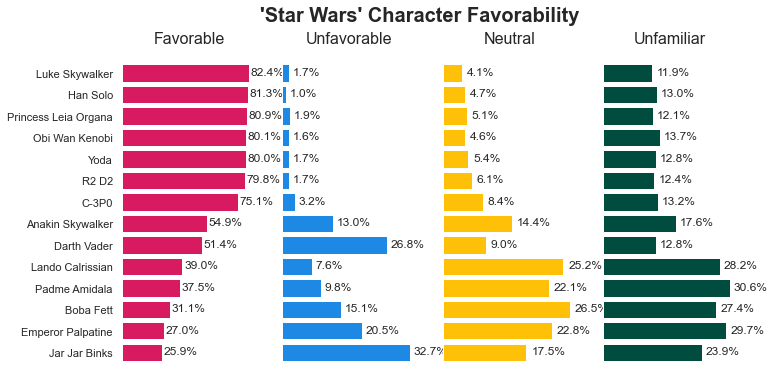

In [42]:
sns.set_style('whitegrid')                                             ###Set to a whitegrid style from seaborn library
char_names = all_characters.index
popularity = ['Favorable', 'Unfavorable', 'Neutral', 'Unfamiliar']
popularity_perc = ['Favorable_perc', 'Unfavorable_perc', 'Neutral_perc', 'Unfamiliar_perc']
color = ['#D81B60','#1E88E5','#FFC107','#004D40']

###Add a layout to prepare our plots
fig = plt.figure(figsize=(11,6))
i = 0


for pp in popularity_perc:
    i += 1
    ax = fig.add_subplot(1,4,i)                                         
    ax.barh(char_names,all_characters[pp],color=color[i-1])             
    ax.grid(False)                                                      
    ax.set_xticks([])                                                   
    string = popularity[i-1]
    ax.set_title(string ,fontsize=16,fontweight=525)                    
   
    if i != 1:                                                         
        ax.set_yticks([])
        
    perc_labels = list(all_characters[pp])                              
    y = -0.1
    for pl in perc_labels:
        x = pl + 1
        string = str(pl) + '%'
        ax.text(x,y,string,fontsize=12)
        y += 1
        
        
    for key,spine in ax.spines.items():                                  
        spine.set_visible(False)
plt.suptitle('\'Star Wars\' Character Favorability',fontweight='bold',fontsize=20)          
plt.show()  


Luke Skywalker and Han Solo were the most favorable characters while Jar Jar Binks and Darth Vader was the most hated character in the Star Wars movies franchise. Most people didn't know Padme Amidala and Emperor Palpatine whereas Princess Leia Organa, Yoda and R2 D2 were among the most popular characters.

## Locations

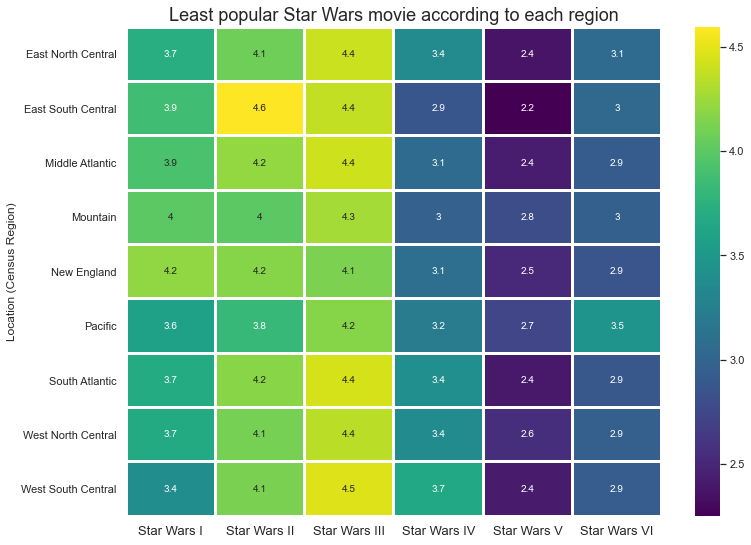

In [45]:
star_pivot = star_wars.pivot_table(values=star_wars.iloc[:,9:15],index='Location (Census Region)')

fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(star_pivot,cmap='viridis',annot=True,lw=2,ax=ax)
ax.set_xticklabels(movie_names,fontsize=13,rotation=0)
plt.title('Least popular Star Wars movie according to each region',fontsize=18,fontweight=525)
plt.show()

According to responders in East South Central the worst movie was Star Wars II. Star Wars III was in most of the location was the least popular movie. The best movie among locations was Star Wars V. 

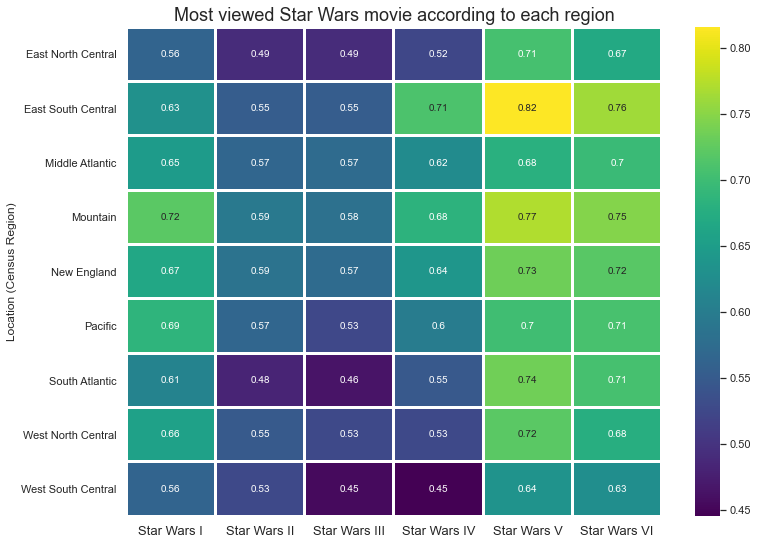

In [47]:
star_piv = star_wars.pivot_table(values=star_wars.iloc[:,3:9],index='Location (Census Region)')

fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(star_piv,cmap='viridis',annot=True,lw=2,ax=ax)
ax.set_xticklabels(movie_names,fontsize=13,rotation=0)
plt.title('Most viewed Star Wars movie according to each region',fontsize=18,fontweight=525)
plt.show()

From the graph below it can be noticed that East North Central, South Atlantic and West South Central are less familar with Star Wars compared to other regions. 82% responders from East South Central had watched Star Wars V.

## Conclusion

Based on the online survey from 'FiveThirtyEight' and above analysis it can be stated that the fifth Star Wars movie: 'The Empire Strikes Back', was considered to be the best movie out of the other 5 movies. The third movie 'Revenge of the Sith', was believed to be the least favorite movie in the franchise. Luke Skywalker is the top most favorable character while Jar Jar Binks was the utmost disliked character of all.